In [157]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [171]:
def init(target_amount=100):
    action = [[]] + [list(range(1,min(i+1, target_amount - i + 1)))\
                     for i in range(1, target_amount)]
    state = list(range(1, target_amount))
    value = [0 for i in range(target_amount+1)]
    reward = [0]*target_amount + [1]
    return action, state, value, reward

def argmax(arr, resolve_clash='random'):
    '''
    resolve_clash: How the clashes are resolved in case of multiple max
                   values {'random', 'first', 'last'} (default->'random')
    '''
    assert len(arr)>0, "argmax requires a non-empty list"
    max_ind = []
    max_val = -1e32
    for i, val in enumerate(arr):
        if max_val<val:
            max_ind = []
            max_ind.append(i)
            max_val = val
        elif max_val==val:
            max_ind.append(i)
    if resolve_clash=='random':
        return max_ind[random.randint(0,len(max_ind)-1)]
    elif resolve_clash=='last':
        return max_ind[-1]
    return max_ind[0]

def run(action, 
        state, 
        value, 
        reward, 
        ph=0.4, 
        delta=1e10, 
        theta=1e-20, 
        gamma=0.99):
    sweeps = 0
    values=[]
    while delta>theta:
        sweeps += 1
        delta = 0.0
        for s in state:
            v = value[s]
            for a in action[s]:
                value[s] = max(value[s], \
                    ph * (reward[s + a] + gamma * value[s + a])\
                    + (1 - ph) * (reward[s - a] + gamma * value[s-a]))
            delta = max(delta, abs(value[s] - v))
        values = values + [value[:]]
    
    return value, sweeps, values

def get_optimal_policy(action,
                       state, 
                       value, 
                       reward,
                       target_amount=target_amount,
                       ph=ph,
                       gamma=gamma,
                       resolve_clash='random'):
    pi = [-1]*(target_amount)
    for s in state:
        options = [ph*(reward[s + a] + gamma * value[s + a])\
                   + (1 - ph)*(reward[s - a] + gamma * value[s - a])\
                   for a in action[s]]
        pi[s] = 1 + argmax(options, resolve_clash='random')
    
    return pi

In [212]:
target_amount = 1000
ph = 0.4
delta = 1e10
theta = 1e-20
gamma = 0.9
sweeps = 0

# Initialize
action, state, value, reward = init(target_amount=target_amount)

# Value iteration algorithm
value, sweeps, values = run(action,
                    state,
                    value,
                    reward,
                    ph=ph,
                    delta=delta,
                    theta=theta,
                    gamma=gamma)

# Optimal Policy
pi = get_optimal_policy(action, 
                        state, 
                        value, 
                        reward,
                        target_amount=target_amount,
                        ph=ph,
                        gamma=gamma,
                        resolve_clash='first')

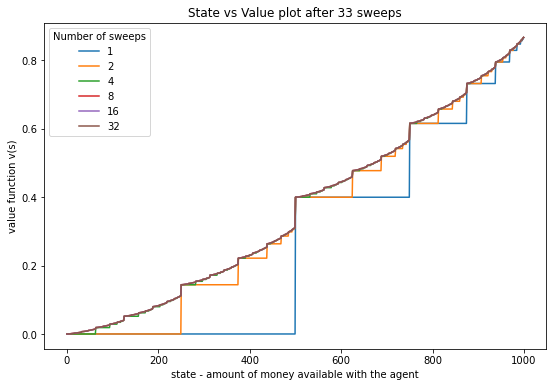

In [213]:
leg = []
i = 1
plt.figure(figsize=(9,6))
while i<len(values):
    leg += [str(i)]
    plt.plot(values[i-1][:-1])
    i *= 2

plt.legend(leg, title='Number of sweeps')
plt.xlabel("state - amount of money available with the agent")
plt.ylabel("value function v(s)")
plt.title(f"State vs Value plot after {sweeps} sweeps")
plt.show();

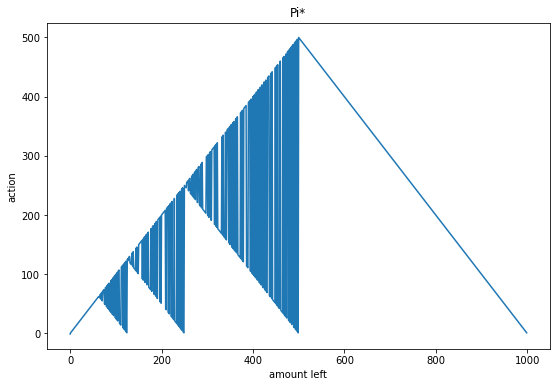

In [214]:
plt.figure(figsize=(9,6))
plt.plot(pi)
plt.xlabel('amount left')
plt.ylabel('action')
plt.title('Pi*')
plt.show();